In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [2]:
folder_name = "/content/drive/My Drive/Colab Notebooks/Neural_Network/neural_network"

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import sys
sys.path.append(f'{folder_name}')

Mounted at /content/drive


In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [6]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8758 - loss: 0.4277 - val_accuracy: 0.9715 - val_loss: 0.0995
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9677 - loss: 0.1061 - val_accuracy: 0.9743 - val_loss: 0.0854
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9775 - loss: 0.0727 - val_accuracy: 0.9790 - val_loss: 0.0679
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9840 - loss: 0.0500 - val_accuracy: 0.9778 - val_loss: 0.0769
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9871 - loss: 0.0416 - val_accuracy: 0.9755 - val_loss: 0.0887


In [8]:
# Evaluasi model pada data test
loss, accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"\nAkurasi pada data uji: {accuracy:.4f}")

313/313 - 1s - 2ms/step - accuracy: 0.9744 - loss: 0.0838

Akurasi pada data uji: 0.9744


In [9]:
# Prediksi
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [10]:
# Cek hasil prediksi untuk gambar pertama
import numpy as np
predicted_label = np.argmax(predictions[0])
actual_label = np.argmax(y_test[0])

print(f"\nLabel asli: {actual_label}")
print(f"Prediksi model: {predicted_label}")


Label asli: 7
Prediksi model: 7


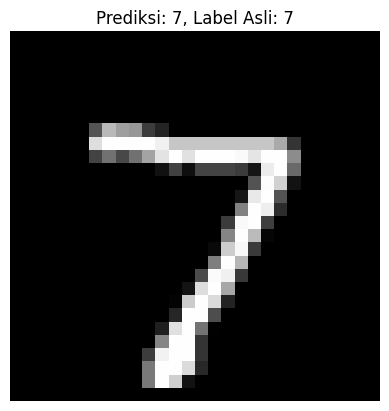

In [11]:
# Tampilkan gambar dan hasil prediksi
import matplotlib.pyplot as plt

plt.imshow(x_test[0], cmap='gray')
plt.title(f"Prediksi: {predicted_label}, Label Asli: {actual_label}")
plt.axis('off')
plt.show()


In [12]:
# Simpan model ke file HDF5 (.h5)
model.save('model_mnist.h5')
print("Model telah disimpan ke file 'model_mnist.h5'")


Model telah disimpan ke file 'model_mnist.h5'


In [13]:
from tensorflow.keras.models import load_model

# Load model dari file
model_baru = load_model('model_mnist.h5')
print("Model berhasil dimuat kembali.")


Model berhasil dimuat kembali.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


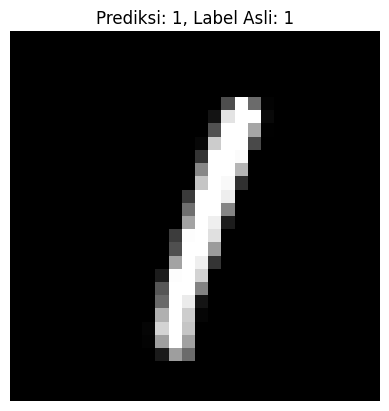

In [14]:
# Prediksi ulang dengan model yang sudah dimuat
predictions_baru = model_baru.predict(x_test)

# Tampilkan hasil prediksi gambar ke-5 sebagai contoh
import numpy as np
import matplotlib.pyplot as plt

idx = 5
plt.imshow(x_test[idx], cmap='gray')
plt.title(f"Prediksi: {np.argmax(predictions_baru[idx])}, Label Asli: {np.argmax(y_test[idx])}")
plt.axis('off')
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


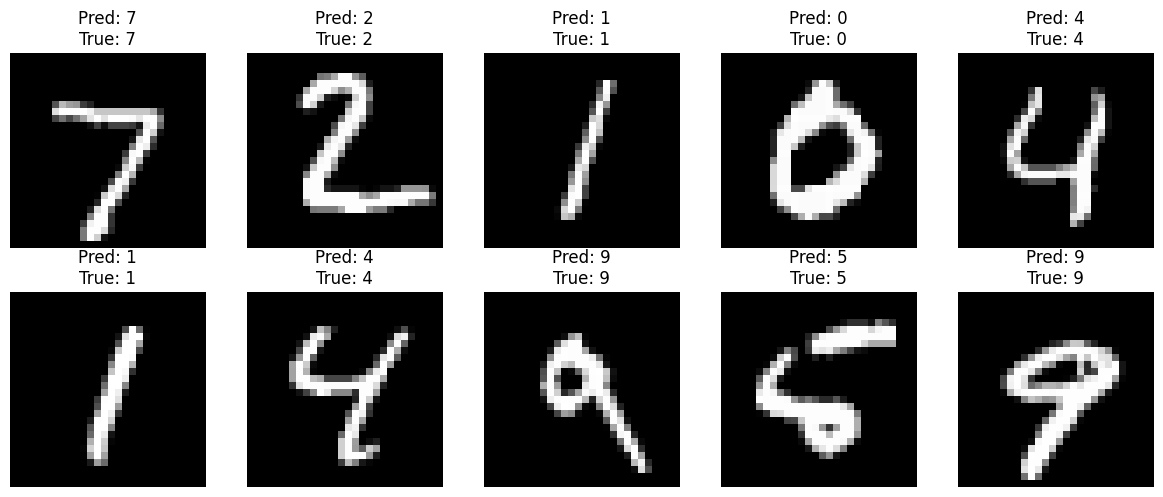

In [15]:
import matplotlib.pyplot as plt
import numpy as np

predictions = model.predict(x_test)
plt.figure(figsize=(12, 5))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Pred: {np.argmax(predictions[i])}\nTrue: {np.argmax(y_test[i])}")
    plt.axis('off')

plt.tight_layout()
plt.show()


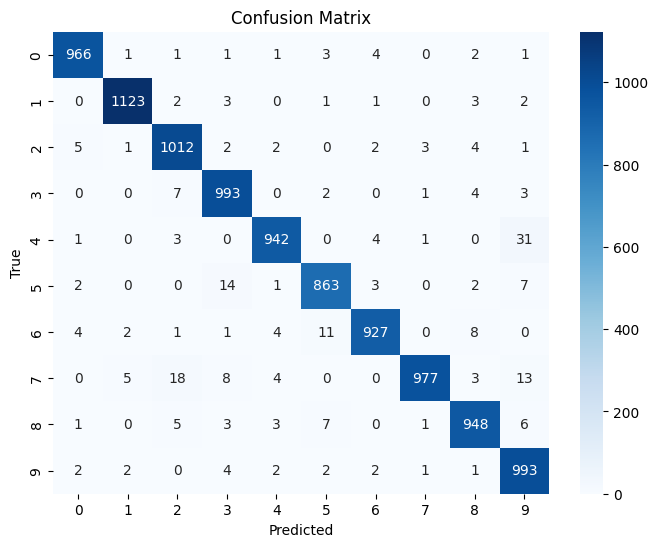

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.98      0.97      1032
           3       0.97      0.98      0.97      1010
           4       0.98      0.96      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.97      0.98       958
           7       0.99      0.95      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.94      0.98      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [16]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Convert one-hot back to label
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(predictions, axis=1)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_true, y_pred))


In [17]:
# Simpan model
model.save('mnist_model_colab.h5')

# Download model ke komputer
from google.colab import files
files.download('mnist_model_colab.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
from IPython.display import display, HTML, Javascript
from google.colab.output import eval_js
from PIL import Image
import io
import cv2
import numpy as np
import base64

def draw():
    display(HTML('''
    <script>
    var canvas = document.createElement('canvas');
    canvas.width = 280;
    canvas.height = 280;
    canvas.style.border = '1px solid black';
    document.body.appendChild(canvas);

    var ctx = canvas.getContext('2d');
    ctx.fillStyle = "black";
    ctx.fillRect(0, 0, canvas.width, canvas.height);

    ctx.strokeStyle = "white";
    ctx.lineWidth = 20;
    var drawing = false;

    canvas.onmousedown = function(e) {
      drawing = true;
      ctx.beginPath();
      ctx.moveTo(e.offsetX, e.offsetY);
    };
    canvas.onmousemove = function(e) {
      if (drawing) {
        ctx.lineTo(e.offsetX, e.offsetY);
        ctx.stroke();
      }
    };
    canvas.onmouseup = function(e) {
      drawing = false;
    };

    var button = document.createElement('button');
    button.innerHTML = "Simpan dan Prediksi";
    document.body.appendChild(button);

    button.onclick = function() {
      var dataURL = canvas.toDataURL('image/png');
      google.colab.kernel.invokeFunction('notebook.save_image', [dataURL], {});
    };

    var clearBtn = document.createElement('button');
clearBtn.innerHTML = "Bersihkan Canvas";
document.body.appendChild(clearBtn);

clearBtn.onclick = function() {
  ctx.fillRect(0, 0, canvas.width, canvas.height);
};

    </script>
    '''))

image_data = None

def save_image(data):
    global image_data
    header, encoded = data.split(",", 1)
    image_data = base64.b64decode(encoded)

from google.colab import output
output.register_callback('notebook.save_image', save_image)

draw()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


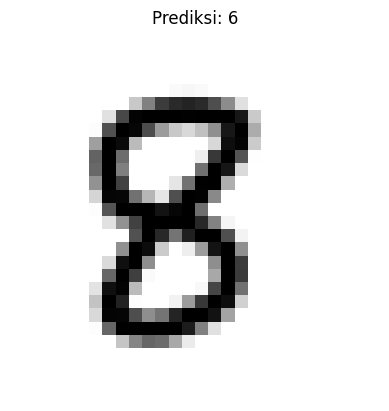

In [21]:
# Simpan gambar dari canvas
with open("drawing.png", "wb") as f:
    f.write(image_data)

# Proses gambar agar cocok untuk input model
img = Image.open("drawing.png").convert('L')  # grayscale
img = img.resize((28, 28))
img = np.array(img)
img = 255 - img  # putih jadi hitam, hitam jadi putih
img = img / 255.0
img = img.reshape(1, 28, 28)

# Prediksi gambar
prediction = model.predict(img)
predicted_digit = np.argmax(prediction)

# Tampilkan hasil
import matplotlib.pyplot as plt
plt.imshow(img.reshape(28, 28), cmap='gray')
plt.title(f'Prediksi: {predicted_digit}')
plt.axis('off')
plt.show()


In [ ]:
# Tampilkan semua probabilitas
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.barplot(x=list(range(10)), y=prediction[0])
plt.title("Probabilitas untuk setiap angka (0-9)")
plt.xlabel("Angka")
plt.ylabel("Confidence")
plt.show()


In [22]:
from google.colab import files

# Simpan gambar ke folder 'saved_drawings'
import os
os.makedirs('saved_drawings', exist_ok=True)

# Tentukan label manual (misal: 5)
label_manual = 5
filename = f'saved_drawings/{label_manual}_{np.random.randint(10000)}.png'
img_to_save = Image.fromarray((img.reshape(28, 28) * 255).astype(np.uint8))
img_to_save.save(filename)

# Unduh file jika ingin simpan ke lokal
files.download(filename)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
from sklearn.model_selection import train_test_split

# Path gambar tulisan tangan
image_dir = '/content/saved_drawings/'

# Load gambar dan label
images = []
labels = []

for filename in os.listdir(image_dir):
    if filename.endswith('.png'):
        # Extract label from filename, ex: 5_1234.png -> label 5
        label = int(filename.split('_')[0])

        # Load image and preprocess
        img = load_img(os.path.join(image_dir, filename), target_size=(28, 28), color_mode='grayscale')
        img = img_to_array(img)
        img = img / 255.0  # Normalisasi gambar

        images.append(img)
        labels.append(label)

# Konversi ke numpy array
X = np.array(images)
y = np.array(labels)

# Split dataset menjadi training dan validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


ValueError: With n_samples=1, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

# Load model yang sudah ada
model = load_model('mnist_model_colab.h5')

# Freeze layer (agar layer sebelumnya tidak berubah)
for layer in model.layers:
    layer.trainable = False

# Tambahkan layer baru untuk retraining
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))  # 10 output untuk angka 0-9

# Compile model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Melatih model dengan data custom
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, batch_size=32)


In [ ]:
# Evaluasi model pada data validasi
loss, accuracy = model.evaluate(X_val, y_val)
print(f"Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")


In [ ]:
# Simpan model yang sudah dilatih ulang
model.save('retrained_mnist_model.h5')

# Download model baru ke komputer
from google.colab import files
files.download('retrained_mnist_model.h5')


In [ ]:
import matplotlib.pyplot as plt

# Grafik Akurasi
plt.plot(history.history['accuracy'], label='Akurasi Train')
plt.plot(history.history['val_accuracy'], label='Akurasi Validation')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.title('Grafik Akurasi Model')
plt.legend()
plt.show()

# Grafik Loss
plt.plot(history.history['loss'], label='Loss Train')
plt.plot(history.history['val_loss'], label='Loss Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Grafik Loss Model')
plt.legend()
plt.show()


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Membuat ImageDataGenerator untuk augmentasi
datagen = ImageDataGenerator(
    rotation_range=15,       # Rotasi acak antara -15 hingga 15 derajat
    zoom_range=0.2,          # Zoom acak
    width_shift_range=0.1,   # Geser gambar secara horizontal
    height_shift_range=0.1,  # Geser gambar secara vertikal
    shear_range=0.2,         # Skew gambar sedikit
    horizontal_flip=True,    # Flip gambar secara horizontal
    fill_mode='nearest'      # Menangani piksel yang hilang setelah augmentasi
)

# Fit generator pada data training (augmentasi data)
datagen.fit(X_train)

# Latih model dengan augmentasi
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    validation_data=(X_val, y_val),
                    epochs=5)


In [ ]:
from tensorflow.keras.datasets import mnist
import numpy as np

# Memuat dataset MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalisasi gambar ke rentang [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Ubah ukuran gambar menjadi (28, 28, 1) untuk menyesuaikan input model
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)


In [ ]:
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Path gambar tulisan tangan yang sudah disimpan
image_dir = '/content/saved_drawings/'

# Load gambar dan label
images = []
labels = []

# Membaca semua gambar yang ada di folder 'saved_drawings'
for filename in os.listdir(image_dir):
    if filename.endswith('.png'):
        # Ambil label dari nama file, misalnya '5_1234.png' -> label 5
        label = int(filename.split('_')[0])

        # Load gambar dan ubah ukuran menjadi (28, 28)
        img = load_img(os.path.join(image_dir, filename), target_size=(28, 28), color_mode='grayscale')
        img = img_to_array(img) / 255.0  # Normalisasi gambar
        images.append(img)
        labels.append(label)

# Konversi ke numpy array
X_train = np.array(images)
y_train = np.array(labels)


In [ ]:
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Path folder gambar di Google Drive, perhatikan path yang benar
image_dir = '/content/saved_drawings/'  # Pastikan path ini benar

# Load gambar dan label
images = []
labels = []

# Membaca semua gambar yang ada di folder 'saved_drawings'
for filename in os.listdir(image_dir): # Ganti dengan image_dir
    if filename.endswith('.png'):  # Ubah kondisi untuk membaca semua file .png
        # Ambil label dari nama file, misalnya '5_1234.png' -> label 5
        label = int(filename.split('_')[0])

        # Load gambar dan ubah ukuran menjadi (28, 28)
        img = load_img(os.path.join(image_dir, filename), target_size=(28, 28), color_mode='grayscale')
        img = img_to_array(img) / 255.0  # Normalisasi gambar
        images.append(img)
        labels.append(label)

# Konversi ke numpy array
X_train = np.array(images)
y_train = np.array(labels)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Membuat ImageDataGenerator untuk augmentasi
datagen = ImageDataGenerator(
    rotation_range=15,       # Rotasi acak antara -15 hingga 15 derajat
    zoom_range=0.2,          # Zoom acak
    width_shift_range=0.1,   # Geser gambar secara horizontal
    height_shift_range=0.1,  # Geser gambar secara vertikal
    shear_range=0.2,         # Skew gambar sedikit
    horizontal_flip=True,    # Flip gambar secara horizontal
    fill_mode='nearest'      # Menangani piksel yang hilang setelah augmentasi
)

# Fit generator pada data training (augmentasi data)
datagen.fit(X_train)

# Ambil beberapa gambar yang sudah di-augmentasi
augmented_images = [datagen.random_transform(X_train[i]) for i in range(5)]

# Tampilkan gambar yang telah di-augmentasi
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, ax in enumerate(axes):
    ax.imshow(augmented_images[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Ubah label ke one-hot encoding
y_train_cat = to_categorical(y_train, num_classes=10)

# Arsitektur model CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')  # Output layer untuk klasifikasi 10 kelas
])

# Kompilasi model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training model
model.fit(X_train, y_train_cat, epochs=10, batch_size=32, validation_split=0.1)


In [ ]:
# Simpan model ke Google Drive
model.save('/content/drive/MyDrive/Collab Notebook/Neural_Network/neyral_netword/my_digit_model.h5')
print("Model berhasil disimpan!")


In [ ]:
# Jika punya data uji (X_test, y_test)
y_test_cat = to_categorical(y_test, num_classes=10)
loss, accuracy = model.evaluate(X_test, y_test_cat)
print(f"Loss: {loss}, Akurasi: {accuracy}")


In [ ]:
import numpy as np

# Contoh prediksi pada gambar pertama dari data latih
img = X_train[0].reshape(1, 28, 28, 1)  # Tambahkan batch dimensi
pred = model.predict(img)
print(f"Prediksi angka: {np.argmax(pred)}")


In [ ]:
import csv
import os
from datetime import datetime

# Path ke folder penyimpanan
save_dir = '/content/drive/MyDrive/Collab Notebook/Neural_Network/neyral_netword/prediksi_angka'
os.makedirs(save_dir, exist_ok=True)

def predict_and_save(image):
    # Proses gambar seperti sebelumnya
    image = image.convert('L').resize((28, 28))
    img_array = 255 - np.array(image)
    img_array = img_array / 255.0
    img_array = img_array.reshape(1, 28, 28, 1)

    # Prediksi
    prediction = model.predict(img_array)
    pred_label = np.argmax(prediction)

    # Simpan gambar hasil prediksi
    timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
    filename = f"{save_dir}pred_{pred_label}_{timestamp}.png"
    image.save(filename)

    # Simpan prediksi ke CSV
    csv_path = os.path.join(save_dir, 'log_prediksi.csv')
    with open(csv_path, mode='a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow([timestamp, pred_label, filename])

    return {str(i): float(prediction[0][i]) for i in range(10)}

